In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

%matplotlib inline


##  Carga del DataSet

In [4]:
cars = pd.read_csv('cars_multi.csv')
df=pd.DataFrame(cars)
df.head()

,ID,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Resumen del Dataset Cars

En este resumen o descripcion basica podemos encontrar promedio `mean` , la desviacion estandar `std`, minimos `min`, maximos `max`, todas estas caracteristicas en cada una de las columnas que tiene posee el DataSet. 

In [15]:
summary = df.describe()
summary = summary.transpose()
summary.head(9)

,count,mean,std,min,25%,50%,75%,max
ID,398.0,199.500000,115.036951,1.0,100.250,199.5,298.750,398.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.449749,38.541172,46.0,75.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [16]:
x=cars.loc[:,'mpg']
# y=cars['horsepower'].dtype
x.head()
# x.astype(int)

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [125]:
df=pd.DataFrame(cars)
ds = df.drop('cylinders', 1)
X = ds.values[:,1:8]
y = df.values[:,2]
# print X
# print y


# Analisis de clasificadores:
###  -RandomForest
###  -Logistic Regression 
###  -Decision Tree

Para este analisis se decisio tomar como columna de etiqueta la caracteristica de pais de origen, puesto que esta columna tiene 3 tipos de datos por lo cual nos puede servir para clasificar a los carros, el nombre de la columna a utilizar es `origin`, decidimos puede decir mucho de sus caracteristicas y con ello esto nos puede hablar mucho de su consumo, pero descubrio que esta caracteristicas no era tan efectiva al momento de clasificar.

In [152]:
from sklearn.metrics import confusion_matrix
dt = DecisionTreeClassifier(max_depth=5)
sv = SVC()
lr = LogisticRegression()
rd= RandomForestClassifier()


X = df.values[:,1:8]
y = df.values[:,8]
y=y.astype('int')
test_size = 0.5
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=test_size)

rd.fit(Xtr,ytr)
print "Random Forest"
print "acierto en train", rd.score(Xtr,ytr)
print "acierto en test ", rd.score(Xts,yts)

lr.fit(Xtr,ytr)
print "Logistic Regrssion"
print "acierto en train", lr.score(Xtr,ytr)
print "acierto en test ", lr.score(Xts,yts)

dt.fit(Xtr,ytr)
print "Decision Tree"
print "acierto en train", dt.score(Xtr,ytr)
print "acierto en test ", dt.score(Xts,yts)

predicciones_train = rd.predict(Xtr)
predicciones_test  = rd.predict(Xts)

cm_train=confusion_matrix(ytr, predicciones_train)
cm_test = confusion_matrix(yts, predicciones_test)
print "matrix de confusión en train\n", cm_train
print "matrix de confusión en test\n", cm_test

Random Forest
acierto en train 0.989949748744
acierto en test  0.768844221106
Logistic Regrssion
acierto en train 0.773869346734
acierto en test  0.768844221106
Decision Tree
acierto en train 0.909547738693
acierto en test  0.748743718593
matrix de confusión en train
[[120   0   0]
 [  1  32   0]
 [  0   1  45]]
matrix de confusión en test
[[114  11   4]
 [ 10  14  13]
 [  5   3  25]]


# Analisis de clasificadores:
###  -RandomForest
###  -Logistic Regression 
###  -Decision Tree

Para este segundo analisis con clasificadores los datos escogidos fueron los de la columna con el nombre de `cylinders`, y se puede observar que la clasificacion con los tres clasificadores funciona de manera bastante optima.

In [151]:
from sklearn.metrics import confusion_matrix
dt = DecisionTreeClassifier(max_depth=5)
sv = SVC()
lr = LogisticRegression()
rd= RandomForestClassifier()


X = ds.values[:,1:8]
y = df.values[:,2]
y=y.astype('int')
test_size = 0.4
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=test_size)

rd.fit(Xtr,ytr)
print "Random Forest"
print "acierto en train", rd.score(Xtr,ytr)
print "acierto en test ", rd.score(Xts,yts)

lr.fit(Xtr,ytr)
print "Logistic Regrssion"
print "acierto en train", lr.score(Xtr,ytr)
print "acierto en test ", lr.score(Xts,yts)

dt.fit(Xtr,ytr)
print "Decision Tree"
print "acierto en train", dt.score(Xtr,ytr)
print "acierto en test ", dt.score(Xts,yts)


Random Forest
acierto en train 0.991596638655
acierto en test  0.95625
Logistic Regrssion
acierto en train 0.945378151261
acierto en test  0.9375
Decision Tree
acierto en train 1.0
acierto en test  0.93125


# Graficas de Frecuencia
#### -MPG
#### -Displacement
#### -Cylinders
#### -HorsePower
#### -Weight
#### -Acceleration
#### -Model

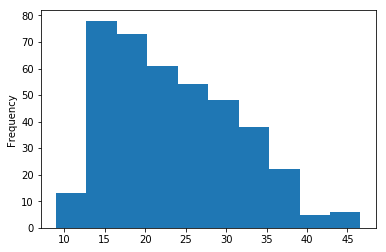

In [153]:
m=cars.loc[:,'mpg']
m.plot(kind="hist",x="mpg")

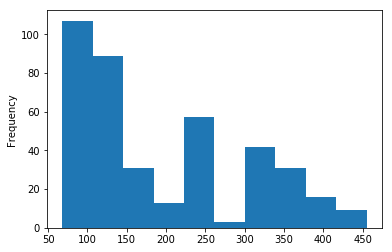

In [155]:
dp=cars.loc[:,'displacement']
dp.plot(kind="hist")

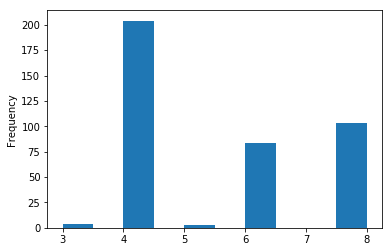

In [156]:
cl=cars.loc[:,'cylinders']
cl.plot(kind="hist")

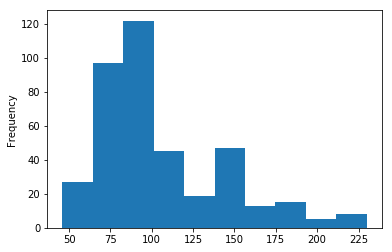

In [157]:
hp=cars.loc[:,'horsepower']
hp.plot(kind="hist")

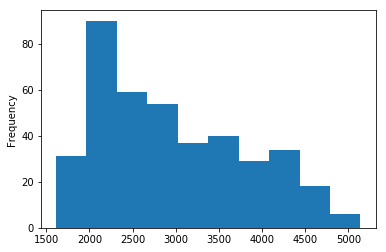

In [158]:
w=cars.loc[:,'weight']
w.plot(kind="hist")

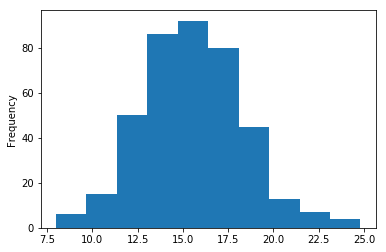

In [97]:
ac=cars.loc[:,'acceleration']
ac.plot(kind="hist")

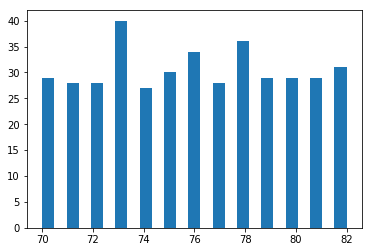

In [159]:
md=cars.loc[:,'model',]
# md.plot(kind="hist")
gmd=plt.hist(md, bins=25)

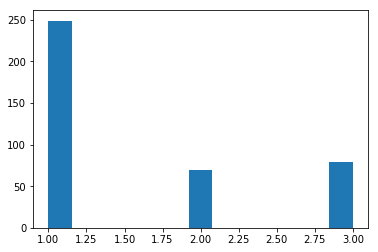

In [170]:
my=cars.loc[:,'origin']
gmy=plt.hist(my,bins=13)

# Analisis Grafico de los carros americanos
Analisis para carros americanos con solo 4 cilindros

In [451]:
america=cars[(cars.origin==1)&(cars.cylinders==4)]
sh=america.shape
gry=america.sort_values('model')


In [452]:
x=[71,72,73,74,75,76,77,78,79,80,81,82]
stma=[]
for i in range(71,83):
    newmdma=gry[(gry.model==i)]
    newmdma=newmdma.loc[:,'mpg']
    x=np.std(newmdma)
    stma.append(x)
    
# print stma
mnma=[]
for i in range(71,83):
    newmdma=gry[(gry.model==i)]
    newmdma=newmdma.loc[:,'mpg']
    x=np.mean(newmdma)
    mnma.append(x)
    
# print mnma


In [ ]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

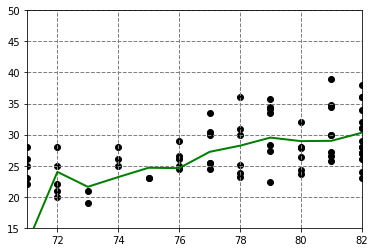

In [453]:
mda=gry.loc[:,'model']
ma=gry.loc[:,'mpg']
fit=np.polyfit(mda,ma,1)
fit_fn=np.poly1d(fit)
plt.scatter(mda,ma,color="black")
# plt.plot(mda,ma,'yo',mda,fit_fn(mda),"--k")
x=[71,72,73,74,75,76,77,78,79,80,81,82]
# plt.fill_between(x,nmnma-nstma,nmnma+nstma,alpha=0.5)
# plt.plot(x,mnma,color="red")
plt.plot(x, smooth(mnma,2), 'g-', lw=2)
plt.ylim(15,50)
plt.xlim(71,82)
plt.grid(color='grey', linestyle='--', linewidth=1)

# Analisis Grafico de los carros Europeos
Analisis para carros americanos con solo 4 cilindros

In [454]:
europe=cars[(cars.origin==2)&(cars.cylinders==4)]
ordeur=europe.sort_values('model')
stmae=[]
for i in range(71,83):
    newmdmae=ordeur[(ordeur.model==i)]
    newmdmae=newmdmae.loc[:,'mpg']
    x=np.std(newmdmae)
    stmae.append(x)
    
# print stma
mnmae=[]
for i in range(71,83):
    newmdmae=ordeur[(ordeur.model==i)]
    newmdmae=newmdmae.loc[:,'mpg']
    x=np.mean(newmdmae)
    mnmae.append(x)
# print mnmae   

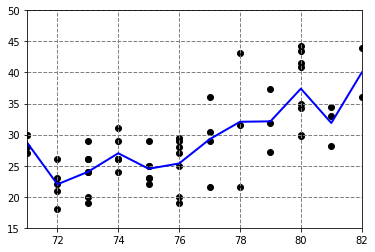

In [455]:
x=[71,72,73,74,75,76,77,78,79,80,81,82]
mdae=ordeur.loc[:,'model']
mae=ordeur.loc[:,'mpg']
fit=np.polyfit(mdae,mae,1)
fit_fn=np.poly1d(fit)
plt.scatter(mdae,mae,color="black")
# plt.plot(mdae,mae,'yo',mdae,fit_fn(mdae),"--k")
# plt.fill_between(x,nmnma-nstma,nmnma+nstma,alpha=0.5)
# plt.plot(x,mnmae,color="red")
plt.plot(x, smooth(mnmae,1),'b-', lw=2)
plt.ylim(15,50)
plt.xlim(71,82)
plt.grid(color='grey', linestyle='--', linewidth=1)

# Analisis Grafico de los carros Japoneses
Analisis para carros americanos con solo 4 cilindros

In [456]:
japan=cars[(cars.origin==3)&(cars.cylinders==4)]
japan=japan.sort_values('model')
stmaj=[]
for i in range(71,83):
    newmdmaj=japan[(japan.model==i)]
    newmdmaj=newmdmaj.loc[:,'mpg']
    x=np.std(newmdmaj)
    stmaj.append(x)
    
# print stmaj
mnmaj=[]
for i in range(71,83):
    newmdmae=japan[(japan.model==i)]
    newmdmae=newmdmae.loc[:,'mpg']
    x=np.mean(newmdmae)
    mnmaj.append(x)
# print mnmaj  

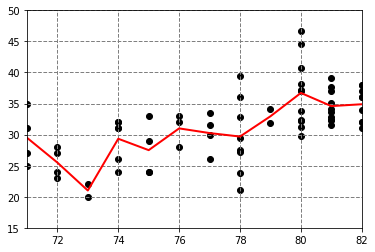

In [457]:
x=[71,72,73,74,75,76,77,78,79,80,81,82]
mdaj=japan.loc[:,'model']
maj=japan.loc[:,'mpg']
fit=np.polyfit(mdaj,maj,1)
fit_fn=np.poly1d(fit)
plt.scatter(mdaj,maj,color="black")
# plt.plot(mdae,mae,'yo',mdae,fit_fn(mdae),"--k")
# plt.fill_between(x,nmnma-nstma,nmnma+nstma,alpha=0.5)
# plt.plot(x,mnmae,color="red")
plt.plot(x, smooth(mnmaj,1),'r-', lw=2)
plt.ylim(15,50)
plt.xlim(71,82)
plt.grid(color='grey', linestyle='--', linewidth=1)

Text(0.5,0,u'modelo')

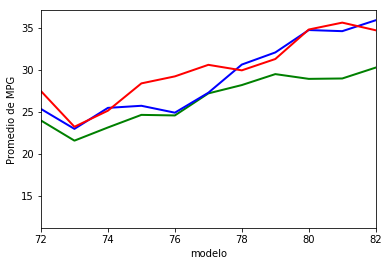

In [468]:
x=[71,72,73,74,75,76,77,78,79,80,81,82]
plt.plot(x, smooth(mnma,2), 'g-', lw=2)
plt.plot(x, smooth(mnmae,2),'b-', lw=2)
plt.plot(x, smooth(mnmaj,2),'r-', lw=2)
plt.xlim(72,82)
plt.ylabel('Promedio de MPG')
plt.xlabel('modelo')

In [469]:
america=cars[(cars.origin==1)&(cars.cylinders==4)]
sh=america.shape
gry=america.sort_values('model')

In [470]:
mnma=[]
for i in range(71,83):
    newmdma=gry[(gry.model==i)]
    newmdma=newmdma.loc[:,'weight']
    x=np.mean(newmdma)
    mnma.append(x)


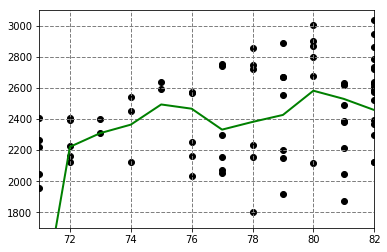

In [471]:
mda=gry.loc[:,'model']
ma=gry.loc[:,'weight']
fit=np.polyfit(mda,ma,1)
fit_fn=np.poly1d(fit)
plt.scatter(mda,ma,color="black")
# plt.plot(mda,ma,'yo',mda,fit_fn(mda),"--k")
x=[71,72,73,74,75,76,77,78,79,80,81,82]
# plt.fill_between(x,nmnma-nstma,nmnma+nstma,alpha=0.5)
# plt.plot(x,mnma,color="red")
plt.plot(x, smooth(mnma,2), 'g-', lw=2)
plt.ylim(1700,3100)
plt.xlim(71,82)
plt.grid(color='grey', linestyle='--', linewidth=1)

In [477]:
europe=cars[(cars.origin==2)&(cars.cylinders==4)]
ordeur=europe.sort_values('model')
mnmae=[]
for i in range(71,83):
    newmdmae=ordeur[(ordeur.model==i)]
    newmdmae=newmdmae.loc[:,'weight']
    x=np.mean(newmdmae)
    mnmae.append(x)

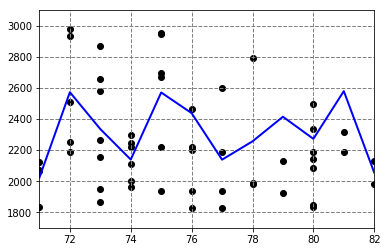

In [478]:
x=[71,72,73,74,75,76,77,78,79,80,81,82]
mdae=ordeur.loc[:,'model']
mae=ordeur.loc[:,'weight']
fit=np.polyfit(mdae,mae,1)
fit_fn=np.poly1d(fit)
plt.scatter(mdae,mae,color="black")
plt.plot(x, smooth(mnmae,1),'b-', lw=2)
plt.ylim(1700,3100)
plt.xlim(71,82)
plt.grid(color='grey', linestyle='--', linewidth=1)

In [474]:
japan=cars[(cars.origin==3)&(cars.cylinders==4)]
japan=japan.sort_values('model')
mnmaj=[]
for i in range(71,83):
    newmdmae=japan[(japan.model==i)]
    newmdmae=newmdmae.loc[:,'weight']
    x=np.mean(newmdmae)
    mnmaj.append(x)

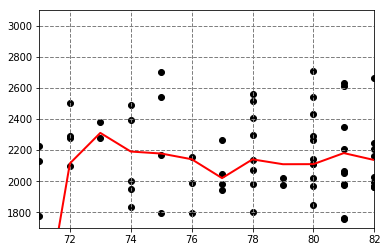

In [450]:
x=[71,72,73,74,75,76,77,78,79,80,81,82]
mdaj=japan.loc[:,'model']
maj=japan.loc[:,'weight']
fit=np.polyfit(mdaj,maj,1)
fit_fn=np.poly1d(fit)
plt.scatter(mdaj,maj,color="black")
# plt.plot(mdae,mae,'yo',mdae,fit_fn(mdae),"--k")
# plt.fill_between(x,nmnma-nstma,nmnma+nstma,alpha=0.5)
# plt.plot(x,mnmae,color="red")
plt.plot(x, smooth(mnmaj,2),'r-', lw=2)
plt.ylim(1700,3100)
plt.xlim(71,82)
plt.grid(color='grey', linestyle='--', linewidth=1)

Text(0.5,0,u'modelo')

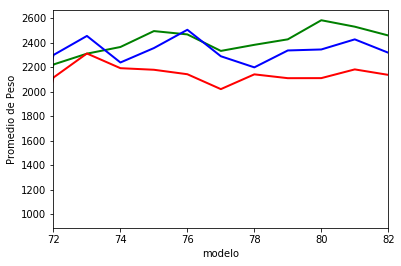

In [491]:
x=[71,72,73,74,75,76,77,78,79,80,81,82]
plt.plot(x, smooth(mnma,2), 'g-', lw=2,label="Americanos")
plt.plot(x, smooth(mnmae,2),'b-', lw=2,label="Europeos")
plt.plot(x, smooth(mnmaj,2),'r-', lw=2,label="Japoneses")
plt.xlim(72,82)
# plt.ylim(1800,2700)
plt.ylabel('Promedio de Peso')
plt.xlabel('modelo')

# Analisis de la relacion MPG vs Peso
En estas lineas de codigo se analizo la relacion que habia en el consumo de gasolina con respecto a su peso ploteando una grafica de dispersion, por otra parte se hizo una regresion lineal, para determinar la relacion que hay entre estas dos variables, por otra parte se hallo una relacion adicional con estas dos variables analizadas previamente con el numero de cilindros que posee un carro.

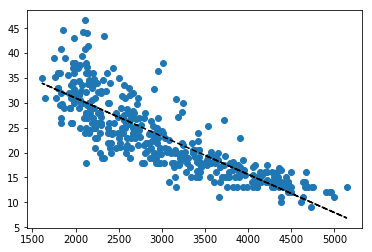

In [409]:
wgc=cars.loc[:,'weight']
mpgc=cars.loc[:,'mpg']
clc=cars.loc[:,'cylinders']
plt.scatter(wgc,mpgc)
fit=np.polyfit(wgc,mpgc,1)
fit_fn=np.poly1d(fit)
plt.plot(wgc,fit_fn(wgc),'--k')

In [410]:
# wgc=cars.loc[:,'weight']
# mpgc=cars.loc[:,'mpg']
# clc=cars.loc[:,'cylinders']
# plt.scatter(wgc,mpgc,c=clc)

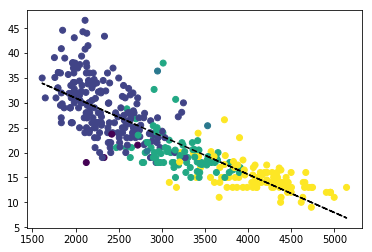

In [14]:
wgc=cars.loc[:,'weight']
mpgc=cars.loc[:,'mpg']
clc=cars.loc[:,'cylinders']
plt.scatter(wgc,mpgc,c=clc)
fit=np.polyfit(wgc,mpgc,1)
fit_fn=np.poly1d(fit)
plt.plot(wgc,fit_fn(wgc),'--k')

In [15]:
def get_r2_numpy(x, y):
    slope, intercept = np.polyfit(x, y, 1)
    r_squared = 1 - (sum((y - (slope * x + intercept))**2) / ((len(y) - 1) * np.var(y, ddof=1)))
    return r_squared

In [17]:
r=get_r2_numpy(wgc,mpgc)
print r

0.691792980034


In [172]:
modelcars=cars.loc[:,'model']
mpgcars=cars.loc[:,'mpg']


In [174]:
# sv.fit(Xtr,ytr)
# print "acierto en train ", sv.score(Xtr,ytr)
# print "acierto en test ", sv.score(Xts,yts)

acierto en train  1.0
acierto en test  0.653266331658
